# Bike rental case study

## Multiple Linear Regression

### Problem Statement:



### Approach:
We are concerned about determining the driver variable for show viewership. This is the case of prediction rather than projection where we are more interested in predicting the key driver variables and their impact rather than forcasting the results.

First we will list down the potential reasons for the decline in viewershp.<br>

The potential reasons could be:
1. Decline in the number of people coming to the platform
2. Fewer people watching the video
3. A Decrease in marketing spend?
4. Competitive shows, e.g. cricket/ IPL
5. Special holidays
6. Twist in the story


### Data
We have been given data for the period of 1 March 2017 to 19 May 2017.<br>
With Columns as<br> 
Views_show         : Number of times the show was viewed<br>
Visitors           : Number of visitors who browsed the platform, but not necessarily watched a video.<br>
Views_platform	   : Number of times a video was viewed on the platform<br>
Ad_impression	   : Proxy for marketing budget. Represents number of impressions generated by ads<br>
Cricket_match_india: If a cricket match was being played. 1 indicates match on a given day, 0 indicates there wasn't<br>
Character_A        : Describes presence of Character A. 1 indicates character A was in the episode, 0 indicates she/he wasn't

In [174]:
# Import required librarie for data processing and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
#read the data from the csv file
bike_data = pd.read_csv("day.csv")
bike_data.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Inspect the Data

In [176]:
#number of rows and columns
bike_data.shape 

(730, 16)

In [177]:
#datatypes of each column
print(bike_data.dtypes) 
# check for null values
print(bike_data.isnull().sum())

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [178]:
# Remove unnecessary data like casual and registered columns
bike_data = bike_data.drop(['instant', 'casual', 'registered'], axis=1)

In [179]:
# visualizing the data using pairplot
#sns.pairplot(bike_data)
#plt.show()

In [180]:
# Date has no much significance to the data as week day, month and year are already present in the dataset, dropping date column
bike_data = bike_data.drop(['dteday'], axis=1)


# Exploratory Data Analysis

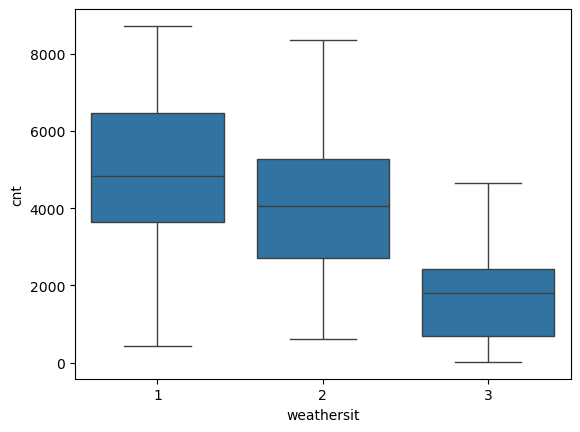

In [181]:
#plot distribution of weather situation
sns.boxplot(x=bike_data['weathersit'], y=bike_data['cnt'])
plt.show()



<Axes: xlabel='mnth'>

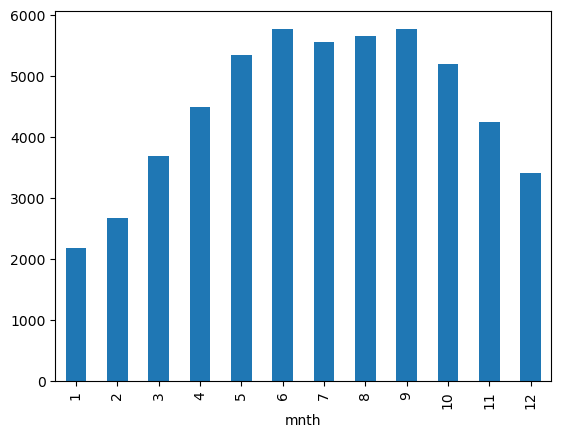

In [182]:
bike_data.groupby('mnth')['cnt'].mean().plot(kind='bar')

<Axes: xlabel='atemp', ylabel='cnt'>

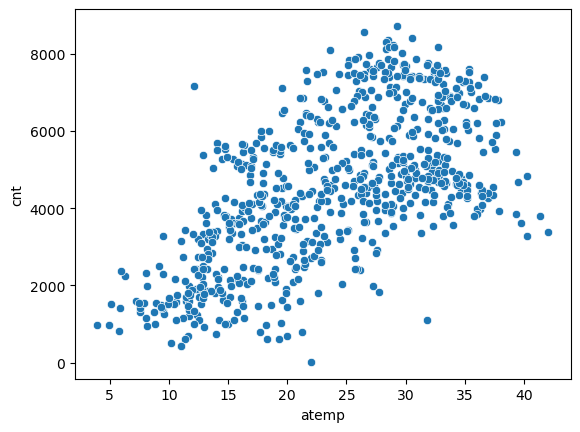

In [183]:
sns.scatterplot(x = bike_data['atemp'], y = bike_data['cnt'])

<Axes: xlabel='hum', ylabel='cnt'>

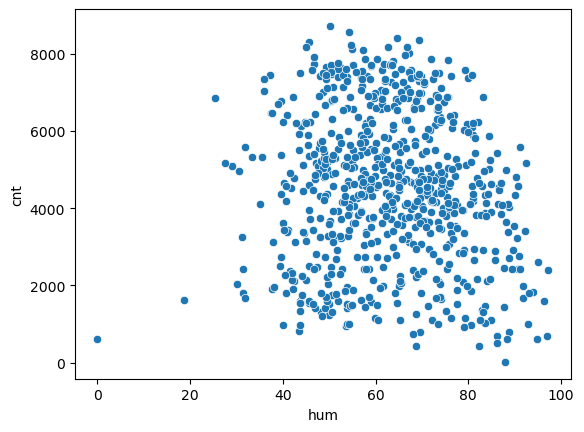

In [184]:
# humidity vs demand
sns.scatterplot(x = bike_data['hum'], y = bike_data['cnt'])

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

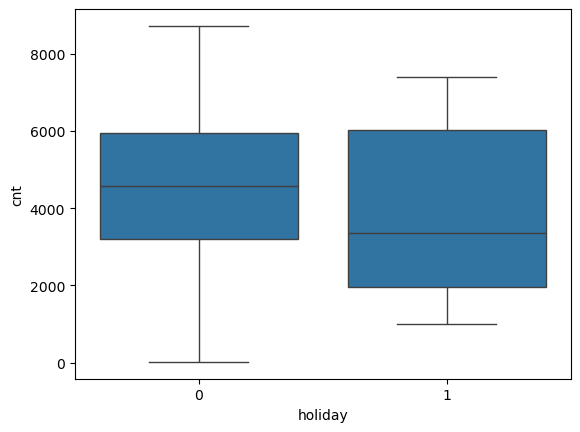

In [185]:
#plot the graph for holiday , week day and working day
sns.boxplot(x=bike_data['holiday'], y=bike_data['cnt'])
bike_data.columns

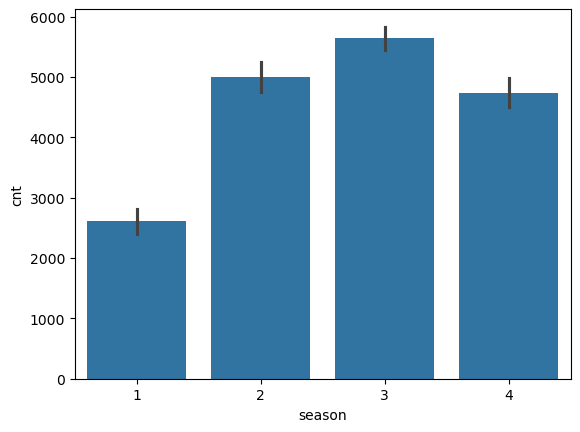

In [186]:
# plotting the graph for season and demand
sns.barplot(x=bike_data['season'], y=bike_data['cnt'])
plt.show()

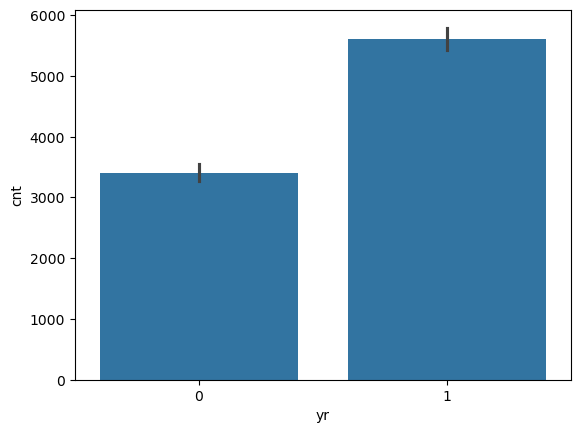

In [187]:
# plotting graph for year and demand
sns.barplot(x=bike_data['yr'], y=bike_data['cnt']) 
plt.show()

## Corelation matrix of numerical variables

<Axes: >

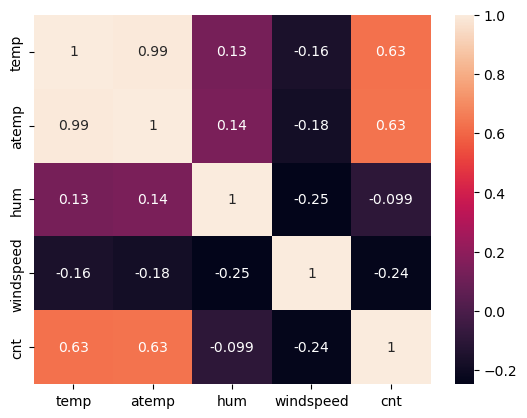

In [188]:

#selecting only numerical vairables for heat map and drawing heat map
sns.heatmap(bike_data[['temp','atemp','hum','windspeed','cnt']].corr(),annot=True)

In [189]:
# as here is a very high correlation between temp and atemp, we can drop one of them
bike_data = bike_data.drop(['atemp'], axis=1)


In [190]:
#adding dummy variables for season, weathersit, mnth, weekday
bike_data = pd.get_dummies(bike_data, columns=['season', 'weathersit', 'mnth', 'weekday'], drop_first=True)
bike_data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_2', 'season_3', 'season_4', 'weathersit_2', 'weathersit_3',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

# Preparing the model 

In [234]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


#splitting the data into train and test
train, test = train_test_split(bike_data, test_size=0.2)
train_x = train.drop(['cnt'], axis=1)
train_y = train['cnt']
test_x = test.drop(['cnt'], axis=1)
test_y = test['cnt']
# adding constant to train_x
train_x = sm.add_constant(train_x)
#converting boolean data to int
cols_needed = ['season_2', 'season_3', 'season_4', 'weathersit_2', 'weathersit_3',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6']
for col in cols_needed:
    train_x[col] = train_x[col].astype(int)

for col in cols_needed:
    test_x[col] = test_x[col].astype(int)

#creating and fitting model
model = sm.OLS(train_y, train_x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     121.8
Date:                Sat, 22 Feb 2025   Prob (F-statistic):          1.27e-213
Time:                        22:04:05   Log-Likelihood:                -4679.5
No. Observations:                 584   AIC:                             9415.
Df Residuals:                     556   BIC:                             9537.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1490.9216    254.916      5.849   

In [235]:
#model 2 with dropping weekday_2 column as it has high P value
train_x = train_x.drop(['weekday_2'], axis=1)
model_2 = sm.OLS(train_y, train_x).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     121.8
Date:                Sat, 22 Feb 2025   Prob (F-statistic):          1.27e-213
Time:                        22:04:05   Log-Likelihood:                -4679.5
No. Observations:                 584   AIC:                             9415.
Df Residuals:                     556   BIC:                             9537.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1490.9216    254.916      5.849   

In [236]:
#model 3 with dropping weekday_1 column as it has high P value
train_x = train_x.drop(['weekday_1'], axis=1)
model_3 = sm.OLS(train_y, train_x).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     126.8
Date:                Sat, 22 Feb 2025   Prob (F-statistic):          1.13e-214
Time:                        22:04:05   Log-Likelihood:                -4679.6
No. Observations:                 584   AIC:                             9413.
Df Residuals:                     557   BIC:                             9531.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1491.4291    254.678      5.856   

In [237]:

#model 4 with dropping mnth_11 column as it has high P value
train_x = train_x.drop(['mnth_11'], axis=1)
model_4 = sm.OLS(train_y, train_x).fit()
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     132.1
Date:                Sat, 22 Feb 2025   Prob (F-statistic):          9.76e-216
Time:                        22:04:05   Log-Likelihood:                -4679.6
No. Observations:                 584   AIC:                             9411.
Df Residuals:                     558   BIC:                             9525.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1491.9403    251.899      5.923   

In [238]:
#model 5 with dropping mnth_11 column as it has high P value
train_x = train_x.drop(['mnth_12'], axis=1)
model_5 = sm.OLS(train_y, train_x).fit()
print(model_5.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     137.8
Date:                Sat, 22 Feb 2025   Prob (F-statistic):          8.27e-217
Time:                        22:04:05   Log-Likelihood:                -4679.6
No. Observations:                 584   AIC:                             9409.
Df Residuals:                     559   BIC:                             9518.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1495.0421    250.029      5.979   

In [239]:

#model 6 with dropping mnth_11 column as it has high P value
train_x = train_x.drop(['mnth_7'], axis=1)
model_6 = sm.OLS(train_y, train_x).fit()
print(model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     144.0
Date:                Sat, 22 Feb 2025   Prob (F-statistic):          7.08e-218
Time:                        22:04:05   Log-Likelihood:                -4679.6
No. Observations:                 584   AIC:                             9407.
Df Residuals:                     560   BIC:                             9512.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1492.4316    249.653      5.978   

In [240]:
#model 7 with dropping mnth_11 column as it has high P value
train_x = train_x.drop(['mnth_2'], axis=1)
model_7 = sm.OLS(train_y, train_x).fit()
print(model_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     150.7
Date:                Sat, 22 Feb 2025   Prob (F-statistic):          7.05e-219
Time:                        22:04:05   Log-Likelihood:                -4679.8
No. Observations:                 584   AIC:                             9406.
Df Residuals:                     561   BIC:                             9506.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1536.6645    240.220      6.397   

In [241]:
#model 8 with dropping weekday_3 column as it has high P value
train_x = train_x.drop(['weekday_3'], axis=1)
model_8 = sm.OLS(train_y, train_x).fit()
print(model_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     157.8
Date:                Sat, 22 Feb 2025   Prob (F-statistic):          9.17e-220
Time:                        22:04:06   Log-Likelihood:                -4680.4
No. Observations:                 584   AIC:                             9405.
Df Residuals:                     562   BIC:                             9501.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1543.0850    240.138      6.426   

In [242]:
#model 9 with dropping weekday_3 column as it has high P value
train_x = train_x.drop(['weekday_5'], axis=1)
model_9 = sm.OLS(train_y, train_x).fit()
print(model_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     165.5
Date:                Sat, 22 Feb 2025   Prob (F-statistic):          1.49e-220
Time:                        22:04:06   Log-Likelihood:                -4681.1
No. Observations:                 584   AIC:                             9404.
Df Residuals:                     563   BIC:                             9496.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1566.0074    239.519      6.538   

In [ ]:
#model 10 with dropping weekday_4 column as it has high P value
train_x = train_x.drop(['weekday_4'], axis=1)
model_10 = sm.OLS(train_y, train_x).fit()
print(model_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     174.5
Date:                Sat, 22 Feb 2025   Prob (F-statistic):          1.18e-221
Time:                        22:04:06   Log-Likelihood:                -4681.2
No. Observations:                 584   AIC:                             9402.
Df Residuals:                     564   BIC:                             9490.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1563.2180    239.199      6.535   

In [244]:
train_x.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'weathersit_2', 'weathersit_3',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_8', 'mnth_9', 'mnth_10',
       'weekday_6'],
      dtype='object')

In [245]:
# model 1 :
lr_sk_m1 = LinearRegression()
lr_sk_m1.fit(train_x,train_y)

LinearRegression()

In [ ]:
# chosing the required columns for model testing
test1_x = test_x[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'weathersit_2', 'weathersit_3',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_8', 'mnth_9', 'mnth_10',
       'weekday_6']]
#add constant to test1_x
test1_x = sm.add_constant(test1_x)
y_pred = lr_sk_m1.predict(test1_x)
r2_score(test_y,y_pred)

0.8129476887359313